# ECMM422 Machine Learning
## Course Assessment 2

This course assessment (CA) represents 60% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the [College website](https://www.exeter.ac.uk/students/administration/complaintsandappeals/academicmisconduct/). 
Students are **not allowed** to use Large Language Models (such as ChatGPT, Claude, Gemini, etc) to generate code for the CA.


**Submission information:**
1. do not change the name of this notebook, i.e. the notebook file has to be: `ca2.ipynb`
2. do not add you name or student code in the notebook or in the file name
3. do not remove or delete or add any cell in this notebook
4. make sure to **remove** and **delete** the `raise NotImplementedError()` under the `# YOUR CODE HERE` and replace it with **your code**: note that if you leave it in the cell you will fail the associated test
5. do not remove the function `save_history()` at the end of each cell. This function will save your edit operations on the code in the cell and will be used as proof of work, i.e. proof that you have been working on the questions assigned
6. work always in the cells provided when developing your implementation, i.e. do not work on another notebook or with programming environments that do not operate on this notebook.
7. when you are finished debugging **remove** all code that is not part of the function definition, i.e. leave only the clean function implementation in the cell: do not leave debugging `print` statements in the functions, and do not leave function invocations on test inputs
8. make sure that the execution of the cell **does not produce any type of output**: the execution of the cell should only define the desired functions
9. before the final submission run the function `check_and_prepare_for_submission()` in the last cell of the notebook: this function will create a zip archive called `ecmm422ca2.zip` which contains your notebook and the folder `proof_of_work`.
10. Submit only the file `ecmm422ca2.zip`


**Evaluation criteria:**

Each question asks for one or more functions to be implemented. 

- Each function is awarded a number of marks. 
- One or more hidden unit tests are going to evaluate if all desired properties of the required function are met. 
- If the function passes a test all the associated marks are awarded, if it fails 0 marks are awarded.
- If you make a typo error (e.g. misspelling a variable) this will likely causes a syntax error, the function execution will fail and you will be awarded 0 marks.
- Do not make assumptions on the state of previous cells, i.e. expect each function to be evaluated independently, moreover expect each function to be tested in the unit tests on some *randomly* generated input.

Although the test use a hard fail/pass strategy to assign marks, the presence of several questions and several unit tests per question allows a fine grading. 

The Checkpoints are not graded by default, but might be used to assign additional marks in case the execution of the code obtains the desired results even when some tests might fail.

**Efficiency:** There is a cap of a few minutes on the execution of each cell and unit test. Make sure your code is not terribly inefficient (for example having a cell run for hours, e.g. using nested loops rather than NumPy functions that can work directly on  arrays), otherwise the execution of the cell/unit test will be interrupted and considered a failure. 

## Conventions and notation:

Do not assume any library is avaialble other than `matplotlib`, `numpy`, `scipy`.

Assume Python 3.8.

---

In the rest of the notebook, the term `data matrix` refers to a two dimensional numpy array where instances are encoded as rows, e.g. a data matrix with 100 rows and 4 columns is to be interpreted as a collection of 100 instances (vectors) each of dimension four.

Make sure to convert numpy `matrix` objects to numpy arrays when returning a data matrix: only arrays are acceptable, not  numpy `matrix` objects. 

In the rest of the notebook, the term `vector` refers to a **one** dimensional numpy array. 

When we explicitly use the term `column vector` we mean a two dimensional array of shape `(n,1)`, when we explicitly use the term `row vector` we mean a two dimensional vector of shape `(1,n)`.

When the term `distance` is used we mean the Euclidean distance. 

The functions you are required to write often need to take in input and return as output such objects, i.e. numpy arrays, not python lists. Check the specifications for each required function in the question text. 

---

**Do not use library functions** to directly solve a question unless explicity instructed to do so. That is, when a required function can be implemented directly by a library function it is intended that the candidate should write their own implementation of the function: for example it the Question asks to implement a function to compute the `accuracy` one cannot just wrap the function `accuracy_score` from `sklearn.metrics` in a custom function; if a question asks to implement the K-nearest_neighbor algorithm one cannot just wrap the function `KNeighborsClassifier` from `sklearn.neighbors` in a custom function.

---

Do not assume that the implementations provided in the Workshops exercises contain no mistakes. You should write and are ultimately responsible for the code that you submit in this Assessment.



In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import cv2
import random
import pandas as pd
from typing import List, Tuple, Callable, Optional
from submission_utils import save_history, check_and_prepare_for_submission
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


## **Question 1**  

<div style="text-align: right"><b>[20 marks]</b></div>  

### **Generating and Visualizing Synthetic Datasets for Geometric Shape Classification**  

---

### **Overview**  

In this section of the assignment, you will implement multiple functions to generate and process a dataset of synthetic images containing geometric shapes. These images will be used for a classification task, where the label depends on the relative sizes of circles and squares.  

To accomplish this, you will implement the following functions:  

1. **`generate_color_palette`**  
   This function generates a palette of distinct RGB colors to be used for drawing shapes.  
   <div style="text-align: right"><b>[2 mark]</b></div>  

2. **`scale_image`**  
   This function resizes an image to a specified resolution.  
   <div style="text-align: right"><b>[2 mark]</b></div>  

3. **`check_overlap`**  
   This function ensures that new shapes do not overlap with previously placed shapes.  
   <div style="text-align: right"><b>[3 mark]</b></div>  

4. **`draw_circle`, `draw_square`, and `draw_triangle`**  
   These functions draw different geometric shapes on an image and compute their areas.  
   <div style="text-align: right"><b>[3 marks]</b></div>  

5. **`generate_image`**  
   This function creates an image with randomly placed geometric shapes while ensuring that at least one circle, one square, and one triangle are present.  
   <div style="text-align: right"><b>[2 marks]</b></div>  

6. **`assign_label`**  
   This function assigns a classification label to an image based on the relative areas of circles and squares.  
   <div style="text-align: right"><b>[4 mark]</b></div>  

7. **`generate_dataset`**  
   This function generates a dataset of images and their corresponding labels.  
   <div style="text-align: right"><b>[2 marks]</b></div>  

8. **`display_sample_images`**  
   This function visualizes random images from the dataset.  
   <div style="text-align: right"><b>[2 mark]</b></div>  

---

### **Details**  

You need to implement a sequence of functions to generate, process, and visualize a synthetic dataset composed of images containing geometric shapes. These images will serve as input for a classification task, where the assigned label depends on the relative sizes of circles and squares within each image. The dataset is designed to provide a structured yet randomized environment for machine learning models to learn shape-based classification.

Each generated image contains a combination of geometric shapes—**circles, squares, and triangles**—drawn with different sizes and colors. The placement of these shapes is randomized while ensuring they do not overlap significantly. To assign a meaningful classification label, the **relative areas** of circles and squares in the image are compared. Based on this comparison, images are categorized into one of three classes:

- **Class 0**: The largest square in the image is significantly larger than the largest circle.  
- **Class 2**: The largest circle in the image is significantly larger than the largest square.  
- **Class 1**: The largest circle and square are of similar size.  

To achieve this, the assignment is divided into a set of interconnected functions, each responsible for a different aspect of dataset generation, image processing, or visualization. Below, we explain how these functions work together in a **logical pipeline**, from image creation to dataset preparation and visualization.

---

### **How the Functions Work Together**

The following functions are implemented sequentially to ensure that each step builds upon the previous ones:

1. **Generating Colors for Shapes (`generate_color_palette`)**  
   - Before drawing any shapes, we need a set of **distinct colors** to make the images visually diverse.  
   - This function **randomly generates a palette** of RGB colors that will be used when drawing shapes in the images.  

2. **Creating and Scaling Individual Images (`generate_image` & `scale_image`)**  
   - Each image is initialized as a **blank white canvas**.  
   - A minimum of **one circle, one square, and one triangle** is drawn using the corresponding shape-drawing functions:  
     - `draw_circle`, `draw_square`, and `draw_triangle` each draw a shape and return its computed area.  
   - To **avoid overlap**, the function `check_overlap` verifies that new shapes do not collide with existing ones before placement.  
   - Once all shapes are placed, the image is resized to the required resolution using `scale_image`.  

3. **Assigning Classification Labels (`assign_label`)**  
   - After an image is generated, we **analyze the largest square and circle** in the image.  
   - Based on the **relative size difference** between the two, a label (`0`, `1`, or `2`) is assigned.  

4. **Generating the Full Dataset (`generate_dataset`)**  
   - This function **calls `generate_image` multiple times** to create `num_samples` images.  
   - The images are stored in a NumPy array `X`, and their corresponding labels (computed using `assign_label`) are stored in `y`.  

5. **Displaying Sample Images (`display_sample_images`)**  
   - After generating the dataset, we need a way to **visually inspect** the images and their assigned labels.  
   - This function **randomly selects images** from the dataset and displays them in a grid using Matplotlib.  

---

### **End-to-End Pipeline Flow**
To summarize, the entire dataset creation and visualization pipeline follows this order:

1. **Generate a color palette** for shape diversity (`generate_color_palette`).  
2. **For each image:**
   - Create a blank canvas.  
   - Draw at least one of each shape type (`draw_circle`, `draw_square`, `draw_triangle`).  
   - Ensure shapes do not overlap (`check_overlap`).  
   - Resize the image to a consistent resolution (`scale_image`).  
3. **Assign a classification label** based on shape sizes (`assign_label`).  
4. **Repeat the process for multiple images** to form a dataset (`generate_dataset`).  
5. **Visualize a few sample images** to verify dataset correctness (`display_sample_images`).  

---

### **Detailed Instructions**  

### 1. `generate_color_palette`  
   - **Task:**  
     Implement a function that generates a list of distinct RGB colors to be used for drawing geometric shapes.  
   - **Parameters:**  
     - `num_colors` (`int`): The number of distinct colors to generate.  
   - **Returns:**  
     - `List[Tuple[int, int, int]]`: A list of RGB tuples, where each tuple represents a color.  
   - **Implementation Notes:**  
     - The function should ensure that generated colors are bright and distinct from the white background.  

---

### 2. `scale_image`  
   - **Task:**  
     Implement a function that resizes an image to a given resolution.  
   - **Parameters:**  
     - `image` (`np.ndarray`): The original image.  
     - `num_pixels` (`int`): The desired width and height of the resized image.  
   - **Returns:**  
     - `np.ndarray`: The resized image.  
   - **Allowed Libraries:**  
     - You may use OpenCV 

---

### 3. `check_overlap`  
   - **Task:**  
     Implement a function that checks whether a new shape overlaps with previously placed shapes.  
   - **Parameters:**  
     - `center` (`Tuple[int, int]`): The center coordinates of the new shape.  
     - `size` (`int`): The size (radius for circles, half-side length for squares and triangles).  
     - `existing_shapes` (`List[dict]`): A list of dictionaries representing existing shapes.  
   - **Returns:**  
     - `bool`: `True` if there is an overlap, `False` otherwise.  

---

### 4. `draw_circle`, `draw_square`, and `draw_triangle`  
   - **Task:**  
     Implement three functions to draw geometric shapes and compute their respective areas.  
   - **Parameters:**  
     - `image` (`np.ndarray`): The image on which the shape is drawn.  
     - `center` (`Tuple[int, int]`): The center coordinates of the shape.  
     - `size` (`int`): The radius (for circles) or half-side length (for squares and triangles).  
     - `color` (`Tuple[int, int, int]`): The RGB color of the shape.  
   - **Returns:**  
     - `float` or `int`: The area of the drawn shape.  
   - **Allowed Libraries:**  
     - You may use OpenCV functions

---

### 5. `generate_image`  
   - **Task:**  
     Implement a function that generates an image containing at least one circle, one square, and one triangle.  
   - **Parameters:**  
     - `img_size` (`int`): The size of the image before resizing.  
     - `num_pixels` (`int`): The final size after scaling.  
     - `color_palette` (`List[Tuple[int, int, int]]`): List of available colors.  
     - `max_shapes` (`int`): Maximum number of shapes to place in the image.  
   - **Returns:**  
     - `np.ndarray`: The final image.  
     - `List[dict]`: A metadata list of shapes in the image.  

---

### 6. `assign_label`  
   - **Task:**  
     Implement a function that assigns a label based on the relative areas of circles and squares.  
   - **Parameters:**  
     - `shapes_metadata` (`List[dict]`): The list of detected shapes and their areas.  
     - `fraction` (`float`): Threshold for determining whether one shape is significantly larger than another.  
   - **Returns:**  
     - `int`:  
       - `0` if the largest square is much larger than the largest circle.  
       - `2` if the largest circle is much larger than the largest square.  
       - `1` if the two shapes are similar in size.  

---

### 7. `generate_dataset`  
   - **Task:**  
     Implement a function that creates a dataset of images and labels by repeatedly calling `generate_image`.  
   - **Parameters:**  
     - `num_samples` (`int`): Number of images to generate.  
     - `img_size` (`int`): Initial image size.  
     - `num_pixels` (`int`): Final image size.  
     - `num_colors` (`int`): Number of distinct colors to use.  
     - `fraction` (`float`): Threshold used by `assign_label`.  
     - `max_shapes` (`int`): Maximum shapes per image.  
   - **Returns:**  
     - `Tuple[np.ndarray, np.ndarray]`: Images and corresponding labels.  
   - **Implementation Notes:**  
     - Use `generate_color_palette` to create colors.  
     - Call `generate_image` for each sample.  
     - Use `assign_label` to determine labels.  

---

### 8. `display_sample_images`  
   - **Task:**  
     Implement a function to display a selection of images from the dataset, ensuring that examples from each class are included in the visualization.  
   - **Parameters:**  
     - `X` (`np.ndarray`): The dataset images.  
     - `y` (`np.ndarray`): Corresponding labels.  
     - `num_samples` (`int`): The number of images to display per class.  
   - **Returns:**  
     - Displays a grid of images using `matplotlib`, where each row corresponds to a different class, and each column contains randomly sampled instances from that class.  

   - **Implementation Notes:**  
     - Ensure that at least `num_samples` images are displayed for each unique label in `y`.  
     - If a class has fewer than `num_samples` instances, display as many as available.  
     - The function should clearly indicate the class label for each displayed image.  

---

### **OpenCV (`cv2`) Library Overview**  

**OpenCV (`cv2`)** is a powerful open-source computer vision library used for image processing, machine learning, and real-time computer vision applications. It provides efficient tools for image manipulation, feature detection, object recognition, and more.

**Installation**  
To install OpenCV, use:  
```bash
pip install opencv-python
```

**Use here**  
You can use `cv2` for resizing images and drawing shapes.

---

In [44]:
def generate_color_palette(num_colors: int) -> List[Tuple[int, int, int]]:
    """
    Generates a color palette with a specified number of distinct colors.
    
    Parameters:
    - num_colors (int): Number of distinct colors to generate.
    
    Returns:
    - list of RGB tuples representing colors.
    """
    # YOUR CODE HERE
    colors = set()
    palette = []
    while len(palette) < num_colors:
        r, g, b = random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)
        if (r + g + b) / 3 < 90:
            continue
        color = (r, g, b)
        if color not in colors:
            colors.add(color)
            palette.append(color)
    return palette

def scale_image(image: np.ndarray, num_pixels: int) -> np.ndarray:
    """
    Scales an image to the desired size.
    
    Parameters:
    - image (np.ndarray): The input image.
    - num_pixels (int): Desired size for width and height.
    
    Returns:
    - np.ndarray: Rescaled image.
    """
    # YOUR CODE HERE
    return cv2.resize(image, (num_pixels, num_pixels), interpolation=cv2.INTER_AREA)

def check_overlap(center: Tuple[int, int], size: int, existing_shapes: List[dict]) -> bool:
    """
    Checks if a new shape overlaps with existing shapes.
    
    Parameters:
    - center (Tuple[int, int]): Center of the new shape.
    - size (int): Size of the new shape.
    - existing_shapes (List[dict]): List of existing shapes.
    
    Returns:
    - bool: True if there is an overlap, False otherwise.
    """
    # YOUR CODE HERE
    x, y = center
    for shape in existing_shapes:
        sx, sy = shape["center"]
        s_size = shape["size"]
        if np.hypot(x - sx, y - sy) < (size + s_size) * 0.85:
            return True
    return False

def draw_circle(image: np.ndarray, center: Tuple[int, int], size: int, color: Tuple[int, int, int]) -> float:
    """
    Draws a circle on an image.
    
    Returns:
    - float: Area of the circle.
    """
    # YOUR CODE HERE
    cv2.circle(image, center, size, tuple(reversed(color)), -1)
    return np.pi * size**2

def draw_square(image: np.ndarray, center: Tuple[int, int], size: int, color: Tuple[int, int, int]) -> int:
    """
    Draws a square on an image.
    
    Returns:
    - int: Area of the square.
    """
    # YOUR CODE HERE
    x, y = center
    top_left, bottom_right = (x - size, y - size), (x + size, y + size)
    cv2.rectangle(image, top_left, bottom_right, tuple(reversed(color)), -1)
    return (2 * size) ** 2

def draw_triangle(image: np.ndarray, center: Tuple[int, int], size: int, color: Tuple[int, int, int]) -> float:
    """
    Draws a triangle on an image.
    
    Returns:
    - float: Area of the triangle.
    """
    # YOUR CODE HERE
    x, y = center
    points = np.array([
        [x, y - size],
        [x - size, y + size],
        [x + size, y + size]
    ])
    cv2.fillPoly(image, [points], tuple(reversed(color)))
    return (np.sqrt(3) / 4) * (2 * size) ** 2


def generate_image(img_size: int, num_pixels: int, color_palette: List[Tuple[int, int, int]], max_shapes: int = 10) -> Tuple[np.ndarray, List[dict]]:
    """
    Generates an image with at least one circle, one square, and one triangle.
    Uses helper functions for shape drawing and scaling.
    
    Parameters:
    - img_size (int): Size of the generated image before scaling.
    - num_pixels (int): Final size of the image after scaling.
    - color_palette (List[Tuple[int, int, int]]): List of available colors.
    
    Returns:
    - np.ndarray: Generated image.
    - List[dict]: Metadata for shapes in the image.
    """
    # YOUR CODE HERE
    image = np.ones((img_size, img_size, 3), dtype=np.uint8) * 255
    shapes_metadata = []
    shape_types = ["circle", "square", "triangle"]
    placed_shapes = set()
    min_size, max_size = img_size // 20, img_size // 9
    max_attempts = 180

    for shape_type in shape_types:
        color = random.choice(color_palette)
        for _ in range(max_attempts):
            size = random.randint(min_size, max_size)
            center = (random.randint(size, img_size - size), random.randint(size, img_size - size))
            if not check_overlap(center, size, shapes_metadata):
                area = draw_circle(image, center, size, color) if shape_type == "circle" else \
                       draw_square(image, center, size, color) if shape_type == "square" else \
                       draw_triangle(image, center, size, color)
                shapes_metadata.append({"type": shape_type, "center": center, "size": size, "area": area})
                placed_shapes.add(shape_type)
                break

    extra_shapes = max(0, max_shapes - len(placed_shapes))
    for _ in range(extra_shapes):
        shape_type = random.choice(shape_types)
        color = random.choice(color_palette)
        for _ in range(max_attempts):
            size = random.randint(min_size, max_size)
            center = (random.randint(size, img_size - size), random.randint(size, img_size - size))
            if not check_overlap(center, size, shapes_metadata):
                area = draw_circle(image, center, size, color) if shape_type == "circle" else \
                       draw_square(image, center, size, color) if shape_type == "square" else \
                       draw_triangle(image, center, size, color)
                shapes_metadata.append({"type": shape_type, "center": center, "size": size, "area": area})
                break
    return scale_image(image, num_pixels), shapes_metadata

def assign_label(shapes_metadata: List[dict], fraction: float = 0.5) -> int:
    """
    Assigns a label based on a fractional comparison of the largest circle and square areas.
    
    Returns:
    - int: 0 if the largest square area is significantly larger than the largest circle area,
           2 if the largest circle area is significantly larger than the largest square area,
           1 otherwise.
    """
    # YOUR CODE HERE
    largest_circle = max((s["area"] for s in shapes_metadata if s["type"] == "circle"), default=0)
    largest_square = max((s["area"] for s in shapes_metadata if s["type"] == "square"), default=0)
    return 0 if largest_square > largest_circle * (1 + fraction) else 2 if largest_circle > largest_square * (1 + fraction) else 1

def generate_dataset(num_samples: int, img_size: int, num_pixels: int, num_colors: int, fraction: float = 2.0, max_shapes: int = 10) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generates a dataset of images and labels in memory.
    
    Returns:
    - tuple[np.ndarray, np.ndarray]: Images (X) and labels (y).
    """
    # YOUR CODE HERE
    color_palette = generate_color_palette(num_colors)
    X, y = [], []
    for i in range(num_samples):
        if i % 100 == 0:
            print(f"Generated {i}/{num_samples} images...")
        img, metadata = generate_image(img_size, num_pixels, color_palette, max_shapes)
        X.append(img)
        y.append(assign_label(metadata, fraction))
    print("Dataset generated!")
    return np.array(X), np.array(y)

def display_sample_images(X: np.ndarray, y: np.ndarray, num_samples: int = 5) -> None:
    """
    Displays randomly sampled images from the dataset with labels.
    """
    # YOUR CODE HERE
    unique_labels = np.unique(y)
    fig, axes = plt.subplots(len(unique_labels), num_samples, figsize=(10, 5))
    for i, label in enumerate(unique_labels):
        indices = np.where(y == label)[0]
        sampled_indices = np.random.choice(indices, min(num_samples, len(indices)), replace=False)
        for j, idx in enumerate(sampled_indices):
            ax = axes[i, j] if len(unique_labels) > 1 else axes[j]
            ax.imshow(cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB))
            ax.set_title(f"Label: {label}")
            ax.axis("off")
    plt.tight_layout()
    plt.show()
    
save_history()

In [45]:
# This cell is reserved for the unit tests. Do not consider this cell.



In [46]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [47]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [48]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [49]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [50]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [51]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [52]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [53]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [54]:
# This cell is reserved for the unit tests. Do not consider this cell.

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
# Run the dataset generation
X, y = generate_dataset(num_samples=1000, img_size=150, num_pixels=100, num_colors=2, fraction=2, max_shapes=1)
display_sample_images(X, y, num_samples=5)
```

and check that you obtain a plot similar to:

<img src="img1.png" width=80%>


Generated 0/1000 images...
Generated 100/1000 images...
Generated 200/1000 images...
Generated 300/1000 images...
Generated 400/1000 images...
Generated 500/1000 images...
Generated 600/1000 images...
Generated 700/1000 images...
Generated 800/1000 images...
Generated 900/1000 images...
Dataset generated!


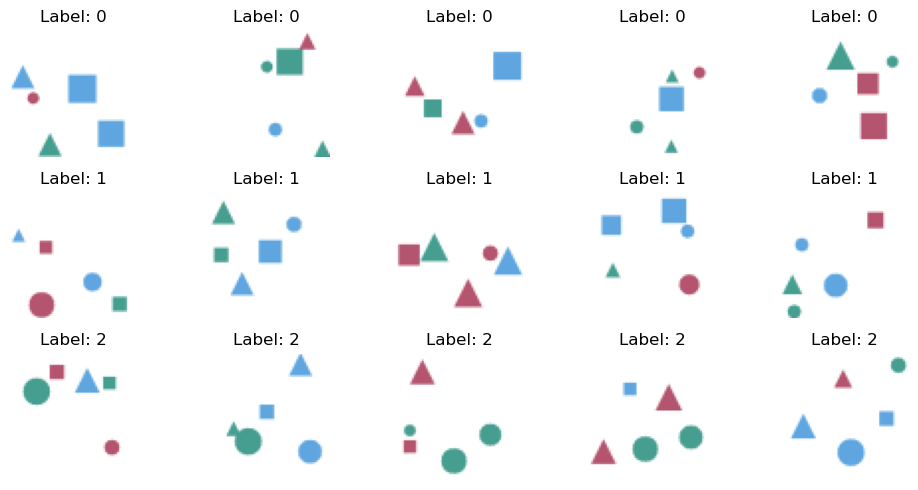

In [55]:
# Run the dataset generation
X, y = generate_dataset(num_samples=1000, img_size=150, num_pixels=64, num_colors=3, fraction=2, max_shapes=5)
display_sample_images(X, y, num_samples=5)

## **Question 2**  

<div style="text-align: right"><b>[10 marks]</b></div>  

**Filtering, Evaluating, and Visualizing Model Performance Using ROC Curves**  

---

### **Objective**  
In this section of the assignment, you will implement functions to **filter the dataset**, **compute classification metrics**, and **visualize the model's performance** using **Receiver Operating Characteristic (ROC) curves**. The goal is to understand how to assess classifiers based on their true positive and false positive rates across different probability thresholds.

You will implement five functions:

1. **`filter_dataset`**  
   This function will **select only relevant class labels** from the dataset and balance them to ensure a fair classification evaluation.  
   <div style="text-align: right"><b>[1 marks]</b></div>  

2. **`true_positive_rate`**  
   This function will compute the **true positive rate (TPR)** given a set of predicted scores and true labels.  
   <div style="text-align: right"><b>[1 marks]</b></div>  

3. **`false_positive_rate`**  
   This function will compute the **false positive rate (FPR)** for a given classifier based on predicted probabilities and ground truth labels.  
   <div style="text-align: right"><b>[1 marks]</b></div>  

4. **`compute_tpr_fpr_range`**  
   This function will aggregate TPR values over multiple score lists and compute **quantile-based confidence bands** for the ROC curve.  
   <div style="text-align: right"><b>[3 marks]</b></div>  

5. **`compute_auc`**  
   This function will compute the AUC ROC.  
   <div style="text-align: right"><b>[1 marks]</b></div>  

6. **`plot_roc`**  
   This function will generate the **ROC curve with confidence intervals**, helping visualize classifier performance.  
   <div style="text-align: right"><b>[3 marks]</b></div>  

---

### **Detailed Instructions**  

### 1. `filter_dataset`  
   - **Task:**  
     Implement the function `filter_dataset` to **remove ambiguous instances** and balance the dataset for binary classification.  
   - **Parameters:**  
     - `X` (`np.ndarray`): The dataset images.  
     - `y` (`np.ndarray`): The corresponding class labels.  
   - **Returns:**  
     - A **filtered and balanced dataset**, where:  
       - Instances labeled `2` are remapped to `1`.  
       - The number of instances for each class (`0` and `1`) is equalized.  
   - **Implementation Notes:**  
     - Use NumPy operations to select and relabel instances efficiently.  
     - Ensure that `X` and `y` are **shuffled after balancing** to avoid unintended biases.  

---

### 2. `true_positive_rate`  
   - **Task:**  
     Implement the function `true_positive_rate` to compute the **true positive rate (TPR)** at different classification thresholds.  
   - **Parameters:**  
     - `preds` (`np.ndarray`): Predicted probabilities for each instance.  
     - `targets` (`np.ndarray`): True binary labels (`0` or `1`).  
   - **Returns:**  
     - A **NumPy array of TPR values** corresponding to different thresholds.  
   - **Mathematical Definition:**  
     $$
     TPR = \frac{\text{True Positives}}{\text{Total Positives}} = \frac{\sum_{i=1}^{N} \mathbb{1}(\hat{y}_i = 1, y_i = 1)}{\sum_{i=1}^{N} \mathbb{1}(y_i = 1)}
     $$
   - **Implementation Notes:**  
     - First, **sort predictions in descending order**.  
     - Compute **cumulative true positives** to construct the ROC curve.  
     - Do **not** use external libraries (e.g., `sklearn`); use only NumPy.  

---

### 3. `false_positive_rate`  
   - **Task:**  
     Implement the function `false_positive_rate` to compute the **false positive rate (FPR)** at different classification thresholds.  
   - **Parameters:**  
     - `preds` (`np.ndarray`): Predicted probabilities for each instance.  
     - `targets` (`np.ndarray`): True binary labels (`0` or `1`).  
   - **Returns:**  
     - A **NumPy array of FPR values** corresponding to different thresholds.  
   - **Mathematical Definition:**  
     $$
     FPR = \frac{\text{False Positives}}{\text{Total Negatives}} = \frac{\sum_{i=1}^{N} \mathbb{1}(\hat{y}_i = 1, y_i = 0)}{\sum_{i=1}^{N} \mathbb{1}(y_i = 0)}
     $$
   - **Implementation Notes:**  
     - The **same sorting strategy as `true_positive_rate`** should be applied.  
     - Compute **cumulative false positives**.  
     - Use NumPy for efficient computation.  

---
**Note:**
In the context of the `true_positive_rate` and `false_positive_rate` functions, the `preds` input is expected to be a **one-dimensional NumPy array** containing the predicted probabilities for the **positive class (class 1)**. This means that for each instance in the dataset, `preds[i]` represents the model's estimated probability that the corresponding instance belongs to class 1. When using models that provide probability outputs, such as `predict_proba` from `sklearn`'s `SVC` with `probability=True`, the output is a **two-dimensional array** with shape `(n_samples, 2)`, where the first column corresponds to the probability of class 0, and the second column corresponds to the probability of class 1. Since we are interested in assessing the model's performance in distinguishing the positive class, we must extract the probabilities for class 1 using `preds = model.predict_proba(X)[:, 1]` before passing them to the `true_positive_rate` and `false_positive_rate` functions. This ensures that the sorting and cumulative calculations are performed correctly, leading to meaningful ROC curves and AUC scores.

---

### 4. `compute_tpr_fpr_range`  
   - **Task:**  
     Implement the function `compute_tpr_fpr_range`, which computes **quantile-based bands** for the ROC curve across multiple prediction scores.  
   - **Parameters:**  
     - `scores_list` (`List[np.ndarray]`): A list of predicted probability arrays from multiple models or resampling iterations.  
     - `y_test` (`np.ndarray`): True class labels for the test set.  
     - `false_positive_rate_func` (`callable`): Function that computes the false positive rate.  
     - `true_positive_rate_func` (`callable`): Function that computes the true positive rate.  
     - `low_quantile` (`float`): Lower quantile (e.g., `0.05`) for the TPR confidence band.  
     - `high_quantile` (`float`): Upper quantile (e.g., `0.95`) for the TPR confidence band.  
   - **Returns:**  
     - `tpr_low`: TPR at the `low_quantile`.  
     - `tpr_high`: TPR at the `high_quantile`.  
     - `tpr_mid`: Median TPR.  
     - `fpr`: False positive rates.  
   - **Implementation Notes:**  
     - Compute **unique false positive rate (FPR) values** from all score arrays.  
     - For each FPR, compute **the distribution of TPRs across all models**.  
     - Extract quantiles (`low_quantile`, `high_quantile`, and median).  

---
**Note:**
The `scores_list` parameter in the `compute_tpr_fpr_range` function is a **list of one-dimensional NumPy arrays**, where each array contains the predicted probabilities for class 1 from different models, resampling iterations, or cross-validation folds. Each element in `scores_list` corresponds to a single experiment or model run, and it holds the probability estimates for all test samples in that run. The shape of each array inside `scores_list` is `(n_samples,)`, meaning it contains a probability value for each test instance. Since different models or resampling iterations might slightly vary in their predictions, `scores_list` allows us to capture the variability and compute **quantile-based confidence intervals** for the ROC curve. When using `predict_proba` from an `sklearn` classifier, it is essential to extract the probabilities for class 1 before appending them to `scores_list`, ensuring that each stored array follows the correct format:  

```python
y_pred = model.predict_proba(X_test)[:, 1]  # Extract only class 1 probabilities
scores_list.append(y_pred)
```

This ensures consistency across multiple runs and allows for proper aggregation when computing the median and confidence bands for the ROC curve.

---

### 5. `compute_auc`
   - **Task:**  
     Implement the function **`compute_auc`**, which computes the area under the ROC curve (AUC) given **True Positive Rate (TPR)** and **False Positive Rate (FPR)** values.  

   - **Parameters:**  
     - `TPR` (`np.ndarray`): A 1D NumPy array of **true positive rate** values computed for different classification thresholds.  
     - `FPR` (`np.ndarray`): A 1D NumPy array of **false positive rate** values computed for different classification thresholds.  

   - **Returns:**  
     - `float`: The computed **AUC** value, which quantifies the classifier's ability to distinguish between positive and negative instances.  

---

### 6. `plot_roc`  
   - **Task:**  
     Implement `plot_roc` to visualize the **ROC curve with confidence bands**.  
   - **Parameters:**  
     - `tpr_low` (`np.ndarray`): Lower bound of TPR confidence interval.  
     - `tpr_high` (`np.ndarray`): Upper bound of TPR confidence interval.  
     - `tpr_mid` (`np.ndarray`): Median TPR values.  
     - `fpr` (`np.ndarray`): False positive rate values.  
     - `compute_auc_func` (`callable`): Function to compute the AUC score.  
   - **Returns:**  
     - A **ROC curve plot** with shaded confidence bands.  
   - **Implementation Notes:**  
     - The **ROC curve should be plotted with**:  
       - A **median TPR curve** (solid black line).  
       - **Shaded confidence bands** using `plt.fill_between`.  
       - A **diagonal baseline** (`y = x`) as a reference.  
     - The **AUC score should be displayed in the title**.  

---


In [56]:
def filter_dataset(X: np.ndarray, y: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Filters the dataset to only include samples with labels 0 and 2,
    remaps label 2 to 1, and then balances the dataset so that both classes
    are represented equally.
    
    Parameters:
    - X (np.ndarray): Input images.
    - y (np.ndarray): Corresponding labels.
    
    Returns:
    - Tuple[np.ndarray, np.ndarray]: Balanced images and remapped labels.
    """
    # YOUR CODE HERE
    y_modified = np.where(y == 2, 1, y)

    indices_class0 = np.where(y_modified == 0)[0]
    indices_class1 = np.where(y_modified == 1)[0]

    min_class_size = min(len(indices_class0), len(indices_class1))

    np.random.seed(42) 
    balanced_indices_class0 = np.random.choice(indices_class0, min_class_size, replace=False)
    balanced_indices_class1 = np.random.choice(indices_class1, min_class_size, replace=False)

    balanced_indices = np.concatenate([balanced_indices_class0, balanced_indices_class1])
  
    np.random.shuffle(balanced_indices)

    X_filtered = X[balanced_indices]
    y_filtered = y_modified[balanced_indices]
    
    return X_filtered, y_filtered

def true_positive_rate(preds: np.ndarray, targets: np.ndarray) -> np.ndarray:
    """Computes the True Positive Rate (TPR) for given predictions and targets."""
    # YOUR CODE HERE
    n_positives = np.sum(targets == 1)
    if n_positives == 0:
        return np.zeros(len(preds))
    sorted_indices = np.argsort(-preds)
    sorted_targets = targets[sorted_indices]
    cumulative_tp = np.cumsum(sorted_targets == 1)
    tpr = cumulative_tp / n_positives
    
    return tpr

def false_positive_rate(preds: np.ndarray, targets: np.ndarray) -> np.ndarray:
    """Computes the False Positive Rate (FPR) for given predictions and targets."""
    # YOUR CODE HERE
    n_negatives = np.sum(targets == 0)
    if n_negatives == 0:
        return np.zeros(len(preds))
    sorted_indices = np.argsort(-preds)
    sorted_targets = targets[sorted_indices]
    cumulative_fp = np.cumsum(sorted_targets == 0)
    fpr = cumulative_fp / n_negatives
    
    return fpr

def compute_auc(TPR: np.ndarray, FPR: np.ndarray) -> float:
    """Computes the Area Under the Curve (AUC) for given TPR and FPR values."""
    # YOUR CODE HERE
    sort_indices = np.argsort(FPR)
    fpr_sorted = FPR[sort_indices]
    tpr_sorted = TPR[sort_indices]

    auc = 0.0
    for i in range(len(fpr_sorted) - 1):
        width = fpr_sorted[i+1] - fpr_sorted[i]
        height = (tpr_sorted[i+1] + tpr_sorted[i]) / 2
        auc += width * height
    
    return auc

def compute_tpr_fpr_range(
    scores_list: List[np.ndarray], 
    y_test: np.ndarray, 
    false_positive_rate_func: Callable[[np.ndarray, np.ndarray], np.ndarray], 
    true_positive_rate_func: Callable[[np.ndarray, np.ndarray], np.ndarray], 
    low_quantile: float, 
    high_quantile: float
) -> Tuple[List[float], List[float], List[float], List[float]]:
    """
    Computes the true positive rate (TPR) and false positive rate (FPR) ranges
    for multiple score distributions.

    Returns:
        - tpr_low: TPR at the `low_quantile`
        - tpr_high: TPR at the `high_quantile`
        - tpr_mid: Median TPR
        - fpr: List of false positive rates
    """
    # YOUR CODE HERE
    all_fprs = []
    for scores in scores_list:
        fpr = false_positive_rate_func(scores, y_test)
        all_fprs.append(fpr)

    all_fprs_flat = np.concatenate(all_fprs)
    unique_fprs = np.unique(all_fprs_flat)

    tpr_distributions = []

    for fpr_value in unique_fprs:
        tprs_at_fpr = []
        
        for scores in scores_list:
            fpr = false_positive_rate_func(scores, y_test)
            tpr = true_positive_rate_func(scores, y_test)

            if fpr_value in fpr:
                idx = np.where(fpr == fpr_value)[0][0]
                tprs_at_fpr.append(tpr[idx])
            elif fpr_value < min(fpr):
                tprs_at_fpr.append(0.0)
            elif fpr_value > max(fpr):
                tprs_at_fpr.append(1.0)  # TPR is 1 when FPR is above the maximum observed
            else:
                # Find indices where fpr_value would be inserted to maintain order
                idx = np.searchsorted(fpr, fpr_value)
                
                # Get the FPR values and corresponding TPRs for interpolation
                fpr_low, fpr_high = fpr[idx-1], fpr[idx]
                tpr_low, tpr_high = tpr[idx-1], tpr[idx]
                
                # Linear interpolation
                if fpr_high != fpr_low:  # Avoid division by zero
                    interp_tpr = tpr_low + (tpr_high - tpr_low) * (fpr_value - fpr_low) / (fpr_high - fpr_low)
                else:
                    interp_tpr = tpr_low
                
                tprs_at_fpr.append(interp_tpr)
        
        tpr_distributions.append(tprs_at_fpr)
    
    # Compute quantiles for TPR at each FPR
    tpr_low = np.array([np.quantile(tpr_dist, low_quantile) for tpr_dist in tpr_distributions])
    tpr_high = np.array([np.quantile(tpr_dist, high_quantile) for tpr_dist in tpr_distributions])
    tpr_mid = np.array([np.quantile(tpr_dist, 0.5) for tpr_dist in tpr_distributions])
    
    return tpr_low, tpr_high, tpr_mid, unique_fprs



def plot_roc(
    tpr_low: List[float], 
    tpr_high: List[float], 
    tpr_mid: List[float], 
    fpr: List[float], 
    compute_auc_func: Callable[[List[float], List[float]], float]
) -> None:
    """
    Plots the ROC curve with confidence intervals.

    Parameters:
        - tpr_low: Lower bound TPR values
        - tpr_high: Upper bound TPR values
        - tpr_mid: Median TPR values
        - fpr: False positive rate values
        - compute_auc_func: Function to compute AUC score
    """
    # YOUR CODE HERE
    # Calculate AUC
    auc = compute_auc_func(tpr_mid, fpr)
    
    # Create figure
    plt.figure()
    
    # Plot diagonal baseline (y = x)
    plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
    
    # Sort by FPR to ensure correct order for plotting
    sort_indices = np.argsort(fpr)
    fpr_sorted = fpr[sort_indices]
    tpr_mid_sorted = tpr_mid[sort_indices]
    tpr_low_sorted = tpr_low[sort_indices]
    tpr_high_sorted = tpr_high[sort_indices]
    
    # Plot median ROC curve
    plt.plot(fpr_sorted, tpr_mid_sorted, 'k-', lw=1, label=f'Median ROC (AUC = {auc:.3f})')
    plt.scatter(fpr_sorted, tpr_mid_sorted, c='black', s=10, zorder=5, label='Operating Points')
    # Plot confidence bands
    plt.fill_between(fpr_sorted, tpr_low_sorted, tpr_high_sorted, color='gray', alpha=0.3, 
                     label='Confidence Band')
    
    # Set plot labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    
    # Set axis limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Add grid and legend
    plt.grid(True, alpha=0.3)
    plt.legend(loc='lower right')
    
    plt.show()

save_history()

In [57]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [58]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [59]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [60]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [61]:
# This cell is reserved for the unit tests. Do not consider this cell. 

In [62]:
# This cell is reserved for the unit tests. Do not consider this cell. 

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
test_tpr_low = [0.04, 0.73, 0.86, 0.91, 1]
test_tpr_high = [0.30, 0.91, 0.95, 1.0, 1]
test_tpr_mid = [0.08, 0.82, 0.91, 0.95, 1]
test_fpr = [0.0, 0.25, 0.51, 0.77, 1]

plot_roc(np.array(test_tpr_low), np.array(test_tpr_high), np.array(test_tpr_mid), np.array(test_fpr), compute_auc)
```

and check that you obtain a plot similar to:

<img src="img2.png" width=40%>


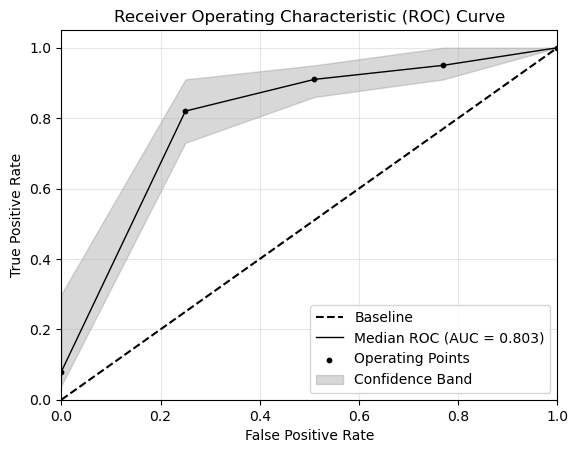

In [63]:
test_tpr_low = [0.04, 0.73, 0.86, 0.91, 1]
test_tpr_high = [0.30, 0.91, 0.95, 1.0, 1]
test_tpr_mid = [0.08, 0.82, 0.91, 0.95, 1]
test_fpr = [0.0, 0.25, 0.51, 0.77, 1]

plot_roc(np.array(test_tpr_low), np.array(test_tpr_high), np.array(test_tpr_mid), np.array(test_fpr), compute_auc)
     

## **Question 3**  

<div style="text-align: right"><b>[20 marks]</b></div>  

### **Image Patch Descriptors and Grid-Based Set Kernel for SVM Classification**  

---
### **Overall Idea and Motivation**  

In this section, you will implement a series of functions to extract **localized features from images** and use them to compute a **custom kernel function** for classification using a **Support Vector Machine (SVM)**. Instead of representing an image as a **single high-dimensional vector of pixel values**, we will break it down into **smaller, structured regions (patches)** and compute **descriptive statistics** about their color distributions.  

This approach allows us to capture **spatial and structural information** within an image, making it particularly useful for **image classification tasks** where different regions contribute uniquely to the overall meaning of an image. Rather than relying on raw pixel intensities, we analyze **how colors are distributed and arranged** within the image.  

To achieve this, we follow a structured process:  
1. **Grid-Based Patch Extraction** - The image is divided into a uniform grid of **smaller patches**, ensuring that local patterns are preserved.  
2. **Feature Computation per Patch** - For each patch, we extract **color-based statistics** that describe the **distribution and spatial arrangement of colors**, rather than their specific RGB values.  
3. **Patch Descriptor Aggregation** - These localized features are **aggregated** into a compact descriptor that summarizes the entire image.  
4. **Custom Kernel Computation** - A **grid-based set kernel function** is used to compare images based on their **patch-level feature representations**.  
5. **SVM Classification** - The computed kernel is used to train an **SVM classifier**, allowing us to distinguish between different classes of images based on **structural and color-based similarities**.  


---

### **Detailed Instructions**  

### **1. `compute_color_features`**  

<div style="text-align: right"><b>[2 marks]</b></div>  

**Task:**  
Implement the function **`compute_color_features`**, which extracts **spatial and statistical features** based on the distribution of colors in an image patch. Rather than focusing on the **identity of specific colors**, this function captures **how colors are spatially arranged** within the patch, making it useful for applications where **patterns and structures matter more than absolute color values**.  

**Parameters:**  
- **`patch`** (`np.ndarray`): A small image region extracted from the larger image, represented as an array of shape `(H, W, 3)`, where `H` and `W` are the height and width of the patch, and `3` corresponds to the RGB color channels.  
- **`ignore_color`** (`tuple`): The RGB color that should be ignored when computing features (default is **white** `(255, 255, 255)`).  

**Returns:**  
- **`list`**: A list of feature vectors, each describing a distinct color present in the patch (excluding the ignored color).  

#### **Extracted Features (Per Unique Color):**  
Each feature vector contains **7 statistical properties** of the corresponding color's spatial distribution:  
1. **Area**: The number of pixels belonging to this color in the patch.  
2. **Centroid X**: The mean x-coordinate of the pixels of this color.  
3. **Centroid Y**: The mean y-coordinate of the pixels of this color.  
4. **Variance X**: The spread of pixels along the x-axis (width direction).  
5. **Variance Y**: The spread of pixels along the y-axis (height direction).  
6. **Skewness X**: The asymmetry in pixel distribution along the x-axis.  
7. **Skewness Y**: The asymmetry in pixel distribution along the y-axis.  

#### **Why Color Identity Is Not Considered?**  
- **Focus on Structure, Not Specific Colors**: The function extracts **how** colors are arranged, rather than which colors are present.  
- **Robust to Color Changes**: Variations in lighting or hue shifts do not affect the computed features.  

#### **Implementation Notes:**  
- Convert the patch into a **set of unique colors** (ignoring the `ignore_color`).  
- For each unique color, compute the **7-dimensional feature vector** described above.  
- Return a **list of feature vectors**, where each entry corresponds to a different color region in the patch.  

---
### **2. `aggregate_features`**  

<div style="text-align: right"><b>[2 marks]</b></div>  

**Task:**  
Implement the function **`aggregate_features`**, which **combines** the color-based feature vectors extracted by `compute_color_features` into a **single feature representation** for the entire image patch. Instead of treating each color separately, this function **aggregates information** about all colors in a way that reflects their **relative importance** in the patch.

---

**Parameters:**  
- **`features`** (`list`): A list of **7-dimensional feature vectors**, where each vector represents a unique color in the patch.  
  - The **first element** of each vector corresponds to the **area** (number of pixels) of that color in the patch.  
  - The remaining six elements describe the **spatial distribution** of the color (e.g., centroid, variance, skewness).  

---

**Returns:**  
- **`np.ndarray`**: A **single 7-dimensional feature vector** representing the entire patch.  
  - This is computed as a **weighted sum of all individual color features**, where the **weight of each color is its area** (number of pixels it occupies in the patch).  
  - The result is **normalized** by dividing by the **total sum of all color areas**, ensuring that the final representation is **scale-invariant** and independent of the number of pixels in the patch.

---

#### **Implementation Notes:**  
 **Handling Empty Patches**  
- If the `features` list is empty (i.e., no valid colors were found in the patch), return a **zero vector** of length 7.  

 **Weighting by Color Importance**  
- Each color's feature vector contributes **proportionally to its area**, meaning that colors covering **more pixels** have a **greater influence** on the final patch representation.  

 **Normalization for Consistency**  
- To ensure that the final vector is **comparable across patches of different sizes**, the weighted sum is **divided by the total sum of all color areas**.  
- This prevents patches with **more pixels** from having disproportionately larger feature values, allowing the representation to capture the **relative distribution of colors, rather than absolute pixel counts**.  

---

### **3. `compute_patch_descriptor`**  

<div style="text-align: right"><b>[4 marks]</b></div>  
   
**Task:**  
     Implement the function **`compute_patch_descriptor`**, which processes a single patch by computing and aggregating color-based features.  

**Parameters:**  
     - `patch` (`np.ndarray`): The input image patch.  
     - `ignore_color` (`tuple`): Color to be ignored in feature computation.  

**Returns:**  
     - `np.ndarray`: A **7-dimensional feature vector** representing the patch.  

**Implementation Notes:**  
     - This function should **call** `compute_color_features` and `aggregate_features`.  

---

### **4. `compute_image_patch_descriptors`**  

<div style="text-align: right"><b>[4 marks]</b></div>  
   
**Task:**  
     Implement the function **`compute_image_patch_descriptors`**, which extracts features from an entire image by dividing it into **grid-based patches** and computing a descriptor for each patch.  

**Parameters:**  
     - `image` (`np.ndarray`): The full input image.  
     - `grid_size` (`int`): The number of patches per row/column.  
     - `ignore_color` (`tuple`): Color to ignore in feature computation.  

**Returns:**  
     - `np.ndarray`: A **3D array** of shape `(grid_size, grid_size, 7)`, where each entry contains the feature vector of a patch.  

**Implementation Notes:**  
     - Divide the image into `grid_size × grid_size` patches.  
     - Extract descriptors using `compute_patch_descriptor`.  

---
### **5. `grid_based_set_kernel`**  

<div style="text-align: right"><b>[4 marks]</b></div>  

**Task:**  
Implement the function **`grid_based_set_kernel`**, which computes the **total similarity** between two images by comparing **each patch descriptor from one image with every patch descriptor from the other**. This function provides a **set-based kernel similarity measure** that captures structural and color-based relationships between the images.  

**Parameters:**  
- **`image1`** (`np.ndarray`): First image of shape `(H, W, 3)`.  
- **`image2`** (`np.ndarray`): Second image of shape `(H, W, 3)`.  
- **`grid_size`** (`int`): The number of patches per row/column (default: `5`).  
- **`ignore_color`** (`tuple`): The RGB color to be ignored during feature extraction (default: `(255, 255, 255)`).  

**Returns:**  
- **`float`**: The **total sum of pairwise similarities** between all patches from both images.  

---

### **6. `kernel_func`**  

<div style="text-align: right"><b>[4 marks]</b></div>  
   
**Task:**  
     Implement the function **`kernel_func`**, which applies `grid_based_set_kernel` to compute the full **kernel matrix** for an SVM classifier.  

**Parameters:**  
     - `X1` (`np.ndarray`): A batch of images (vectorized).  
     - `X2` (`np.ndarray`): A second batch of images.  
     - `num_pixels` (`int`): The original image size before vectorization.  
     - `grid_size` (`int`): The number of patches per row/column.  
     - `ignore_color` (`tuple`): Color to ignore.  

**Returns:**  
     - `np.ndarray`: The computed **kernel matrix** of shape `(n1, n2)`.  

**Implementation Notes:**  
     - **Reshape** vectorized images back into `(num_pixels, num_pixels, 3)`.  
     - Compute pairwise **grid-based set kernel values**.  

---


#### **Input Format**
- `X` is initially **vectorized**, meaning it is a **2D array** of shape:  
  $(n, H \times W \times C)$
  where:
  - `n` is the number of samples (training or test images).
  - `H × W × C` is the total number of pixels, flattened into a single dimension.
  - here `H=W=num_pixels` and `C=3` 
---


In [64]:
def compute_color_features(patch: np.ndarray, ignore_color: Tuple[int, int, int] = (255, 255, 255)) -> List[np.ndarray]:
    """
    Extracts color-based spatial features from an image patch.
    
    Parameters:
        patch (np.ndarray): The input patch of shape (H, W, 3).
        ignore_color (Tuple[int, int, int]): Color to ignore (default: white).

    Returns:
        List[np.ndarray]: A list of feature vectors, each describing a unique color in the patch.
    """
    # YOUR CODE HERE
    height, width, _ = patch.shape
    features = []

    pixels = patch.reshape(-1, 3)
    unique_colors, color_indices = np.unique(pixels, axis=0, return_inverse=True)

    yy, xx = np.meshgrid(np.arange(height), np.arange(width), indexing='ij')
    x_coords, y_coords = xx.flatten(), yy.flatten()

    for i, color in enumerate(unique_colors):
        if np.array_equal(color, ignore_color):
            continue
        
        mask = (color_indices == i)
        if not np.any(mask):
            continue
        
        x, y = x_coords[mask], y_coords[mask]
        area = len(x)
        
        if area > 0:
            cx, cy = np.mean(x), np.mean(y)
            var_x, var_y = np.var(x), np.var(y)
            std_x, std_y = np.std(x) + 1e-8, np.std(y) + 1e-8
            skew_x = np.mean((x - cx)**3) / std_x**3
            skew_y = np.mean((y - cy)**3) / std_y**3
            
            feature = np.array([area, cx, cy, var_x, var_y, skew_x, skew_y], dtype=np.float32)
            features.append(feature)
    
    return features

def aggregate_features(features: List[np.ndarray]) -> np.ndarray:
    """
    Aggregates color-based features into a single patch descriptor.
    
    Parameters:
        features (List[np.ndarray]): A list of feature vectors.

    Returns:
        np.ndarray: A 7-dimensional aggregated feature vector.
    """
    # YOUR CODE HERE
    if not features:
        return np.zeros(7, dtype=np.float32)
    
    features_array = np.array(features)
    areas = features_array[:, 0]
    total_area = np.sum(areas)
    
    return np.average(features_array, axis=0, weights=areas) if total_area > 0 else np.zeros(7, dtype=np.float32)

def compute_patch_descriptor(patch: np.ndarray, ignore_color: Tuple[int, int, int] = (255, 255, 255)) -> np.ndarray:
    """
    Computes a single descriptor for an image patch by aggregating color features.

    Parameters:
        patch (np.ndarray): The input patch of shape (H, W, 3).
        ignore_color (Tuple[int, int, int]): Color to ignore (default: white).

    Returns:
        np.ndarray: A 7-dimensional descriptor representing the patch.
    """
    # YOUR CODE HERE
    return aggregate_features(compute_color_features(patch, ignore_color))

def compute_image_patch_descriptors(image: np.ndarray, grid_size: int, ignore_color: Tuple[int, int, int] = (255, 255, 255)) -> np.ndarray:
    """
    Computes descriptors for an entire image by dividing it into a grid of patches.

    Parameters:
        image (np.ndarray): The input image of shape (H, W, 3).
        grid_size (int): Number of patches per row/column.
        ignore_color (Tuple[int, int, int]): Color to ignore (default: white).

    Returns:
        np.ndarray: An array of shape (grid_size, grid_size, 7) containing feature descriptors.
    """
    # YOUR CODE HERE
    h, w, _ = image.shape
    patch_h, patch_w = h // grid_size, w // grid_size
    descriptors = np.zeros((grid_size, grid_size, 7), dtype=np.float32)
    
    for i in range(grid_size):
        for j in range(grid_size):
            patch = image[i * patch_h:(i + 1) * patch_h, j * patch_w:(j + 1) * patch_w]
            descriptors[i, j] = compute_patch_descriptor(patch, ignore_color)
    
    return descriptors

def grid_based_set_kernel(image1: np.ndarray, image2: np.ndarray, grid_size: int = 5, ignore_color: Tuple[int, int, int] = (255, 255, 255)) -> float:
    """
    Computes the total similarity between two images by comparing each patch descriptor
    in one image with every patch descriptor in the other image.

    Parameters:
        image1 (np.ndarray): First image of shape (H, W, 3).
        image2 (np.ndarray): Second image of shape (H, W, 3).
        grid_size (int): Number of patches per row/column (default: 5).
        ignore_color (Tuple[int, int, int]): Color to ignore (default: white).

    Returns:
        float: The total similarity value computed as the sum of all pairwise similarities.
    """
    # YOUR CODE HERE
    desc1 = compute_image_patch_descriptors(image1, grid_size, ignore_color)
    desc2 = compute_image_patch_descriptors(image2, grid_size, ignore_color)
    
    similarity_matrix = desc1.reshape(-1, 7) @ desc2.reshape(-1, 7).T
    return float(np.sum(similarity_matrix))


def kernel_func(X1: np.ndarray, X2: np.ndarray, num_pixels: int = 64, grid_size: int = 5, ignore_color: Tuple[int, int, int] = (255, 255, 255)) -> np.ndarray:
    """
    Custom kernel function for SVM that computes a grid-based set kernel.
    
    Parameters:
        X1 (np.ndarray): Array of vectorized images (n1, num_pixels*num_pixels*3).
        X2 (np.ndarray): Array of vectorized images (n2, num_pixels*num_pixels*3).
        num_pixels (int): The height/width of the original square images (default: 64).
        grid_size (int): Number of patches per row/column for the grid-based descriptor (default: 5).
        ignore_color (Tuple[int, int, int]): Color to ignore when computing descriptors (default: white).

    Returns:
        np.ndarray: Kernel matrix of shape (n1, n2) computed by averaging the similarities of patch descriptors between the two images.
    """
    # YOUR CODE HERE
    n1, n2 = X1.shape[0], X2.shape[0]
    kernel_matrix = np.zeros((n1, n2), dtype=np.float32)
    
    for i in range(n1):
        image1 = X1[i].reshape(num_pixels, num_pixels, 3)
        for j in range(n2):
            image2 = X2[j].reshape(num_pixels, num_pixels, 3)
            kernel_matrix[i, j] = grid_based_set_kernel(image1, image2, grid_size, ignore_color)
    
    return kernel_matrix

save_history()

In [65]:
# This cell is reserved for the unit tests. Do not consider this cell.

In [66]:
# This cell is reserved for the unit tests. Do not consider this cell.

In [67]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [68]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [69]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [70]:
# This cell is reserved for the unit tests. Do not consider this cell.


## **Question 4**

<div style="text-align: right"><b>[35 marks]</b></div>

### **Build a Simple Convolutional Neural Network (CNN)**

---

### **Objective:**

In this question, you will **implement a simple CNN classifier from scratch** using only NumPy. The CNN will consist of:

1. A **custom convolutional layer** that applies multiple **trainable filters** over an input image.
2. A **max pooling layer** to downsample feature maps and extract the most significant information.
3. A **fully connected (dense) layer** that acts as the classifier for the extracted features.
4. An **end-to-end training pipeline** that allows the CNN to be trained using gradient descent.

This task will **not** use deep learning libraries such as TensorFlow or PyTorch. Instead, you will manually implement the forward pass and update weights using gradient descent. However, the **backward pass is only required for the fully connected layer** and **not** for the convolutional or pooling layers.

---

## **Overview of CNN Components**
A Convolutional Neural Network (CNN) processes images through multiple stages:

1. **Convolution (conv2d)**
   - Detects **edges, textures, and patterns** by applying **filters (kernels)** over the image.
   - You will implement **conv2d from scratch** using only NumPy.
   - This layer **extracts local spatial features** by sliding a **small window** over the image.
  
2. **Activation Function (ReLU)**
   - Introduces **non-linearity** to help the network model complex patterns.
   - Applied **after the convolution operation**.
  
3. **Max Pooling**
   - Reduces **spatial dimensions** while keeping **important features**.
   - Helps **reduce computation cost** and makes the model more **invariant to small translations**.
  
4. **Fully Connected (Dense) Layer**
   - Connects **all extracted features** to predict the class label.
   - Uses **Softmax activation** for classification.
   - The **backward phase only applies here** for **gradient descent optimization**.

---

## **Tasks and Function Descriptions**

In this question, you will implement the following functions and classes:

### **1. `conv2d_numpy`**  
<div style="text-align: right"><b>[5 marks]</b></div>

**Task:** Implement **convolution** manually using NumPy arrays. This function applies a **filter (kernel)** over an image.  
**Important:** You **must not use** built-in functions like `correlate2d`. Instead, implement **convolution manually** by iterating over the input image.

- **Parameters:**
  - `image` (`np.ndarray`): Input image **(H, W)**.
  - `kernel` (`np.ndarray`): Filter (Kernel) **(kH, kW)**.

- **Returns:**
  - `np.ndarray`: Output feature map **(H-kH+1, W-kW+1)**.

- **Implementation Notes:**
  - **Flip the kernel** both horizontally and vertically (**true convolution**).
  - Iterate over the **valid region** of the image.
  - This function will be used in **`ConvLayer.forward()`**.

---

### **2. `relu`**
<div style="text-align: right"><b>[2 marks]</b></div>

**Task:** Apply the **ReLU activation function** element-wise after convolution.

- **Parameters:**
  - `x` (`np.ndarray`): Input array.
- **Returns:**
  - `np.ndarray`: ReLU-activated output.
- **Formula:**
  - $$ ReLU(x) = \max(0, x) $$
- **Used In:**  
  - Applied after convolution to introduce **non-linearity**.

---

### **3. `softmax`**
<div style="text-align: right"><b>[2 marks]</b></div>

**Task:** Convert raw **logits** into **class probabilities**.

- **Parameters:**
  - `x` (`np.ndarray`): Input logits.
- **Returns:**
  - `np.ndarray`: Softmax probabilities.

- **Formula:**  
  - $$ Softmax(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $$

- **Used In:**  
  - Applied at the final classification layer to compute **probabilities**.

---

### **4. `ConvLayer`**  
<div style="text-align: right"><b>[5 marks]</b></div>  

#### **Task:**  
Implement a **2D convolutional layer** using `conv2d_numpy`. This layer applies **multiple convolutional filters** to an input image to extract meaningful spatial features. Each filter is convolved across the input image, producing an output feature map that highlights different patterns, such as edges, textures, or shapes.

#### **Initialization Parameters:**  
- `num_filters` (`int`): Number of convolutional filters applied to the input image. Each filter learns to detect different spatial patterns.  
- `kernel_size` (`int`): Size of each square filter (e.g., `3x3` or `5x5`). The filter dimensions determine the local receptive field of the convolution.  
- `input_channels` (`int`): Number of input channels (default: `3` for RGB images). If working with grayscale images, this should be `1`.  

#### **Methods:**  
1. **`__init__(self, num_filters, kernel_size, input_channels=3)`**  
   - Initializes the layer with `num_filters` randomly initialized kernels.  
   - Each filter has a shape of `(input_channels, kernel_size, kernel_size)`, meaning that each filter processes all input channels.  
   - The filter weights are **randomly initialized** using a scaled normal distribution to prevent issues like vanishing or exploding gradients.  

2. **`forward(self, input_image)`**  
   - Applies `num_filters` convolutional kernels to the input image.  
   - Uses **manual 2D convolution (`conv2d_numpy`)** for each filter.  
   - Produces an output of shape `(num_filters, output_height, output_width)`, where each output channel corresponds to a feature map extracted by a filter.  

---

### **Weight Initialization Strategy**  

#### **Why Proper Initialization is Important?**  
Proper initialization of filter weights is **crucial** for stable training and efficient learning in deep networks. Poor initialization can lead to issues such as:  
- **Vanishing gradients** (if initialized too small).  
- **Exploding gradients** (if initialized too large).  
- **Slow convergence** if initialization does not match the expected scale of activations.  


#### **Initialization Strategies**

A common strategy is to initialize weights using a **scaled normal distribution** based on the number of input connections per neuron. The two widely used methods are:

- **Xavier (Glorot) Initialization**: Suitable for activations with **sigmoid** or **tanh** functions.  
  - Variance:  
    $$
    \frac{1}{\text{fan}_{\text{in}} + \text{fan}_{\text{out}}}
    $$
  
- **He Initialization**: Suitable for **ReLU-based** networks, where positive activations dominate.  
  - Variance:  
    $$
    \frac{2}{\text{fan}_{\text{in}}}
    $$
    (This helps prevent the outputs from shrinking.)

**How you should implement it in `ConvLayer`**  
You could use the **He initialization** since convolutional layers precede ReLU activation functions. The standard deviation can be scaled as follows:  

$$
\text{scale} = \sqrt{\frac{2}{\text{kernel\_size} \times \text{kernel\_size} \times \text{input\_channels}}}
$$

Each filter weight can be initialized using a normal distribution centered at `0` with this computed standard deviation:

```python
scale = np.sqrt(2.0 / (kernel_size * kernel_size * input_channels))
self.filters = np.random.randn(num_filters, input_channels, kernel_size, kernel_size) * scale
```

This would ensures that:  
- The weights start with an appropriate scale for stable learning.  
- Gradient magnitudes are balanced across layers, preventing vanishing/exploding gradients.  
- Each filter learns meaningful spatial features efficiently.  

By using this initialization strategy, the convolutional layer can **learn robust feature representations** from images while ensuring stable and efficient training.

---

### **5. `MaxPoolLayer`**
<div style="text-align: right"><b>[4 marks]</b></div>

**Task:** Implement a **Max Pooling Layer** to reduce feature map size.

- **Initialization Parameters:**
  - `pool_size` (`int`): Pooling window size.

- **Methods:**
  1. **`forward(input_image)`**
     - Slides a **pool_size x pool_size** window over the image.
     - Takes the **maximum** value from each region.

- **Used In:**  
  - Reduces **dimensionality** while **retaining important features**.

---

### **6. `TwoLayerFullyConnected`**
<div style="text-align: right"><b>[7 marks]</b></div>

**Task:** Implement a **2-layer fully connected classifier**.

- **Initialization Parameters:**
  - `input_size` (`int`): Flattened input size.
  - `hidden_size` (`int`): Neurons in the hidden layer.
  - `output_size` (`int`): Number of classes.

- **Methods:**
  1. **`forward(input_vector)`**
     - Applies a fully connected **linear transformation**.
     - Uses **ReLU activation** in the hidden layer.

  2. **`backward(dL_dout, learning_rate)`**
     - **Backpropagates gradients and updates weights.**
     - Uses **gradient descent**.

- **Used In:**  
  - Final classification layer of the CNN.

---

### **7. `SimpleCNN`**
<div style="text-align: right"><b>[10 marks]</b></div>

**Task:** Combine all layers into a **trainable CNN model**.

- **Initialization Parameters:**
  - `image_size` (`int`): Size of input images.
  - `num_filters` (`int`): Number of filters in the convolutional layer.
  - `kernel_size` (`int`): Filter size.
  - `pool_size` (`int`): Pooling window size.
  - `num_classes` (`int`): Number of output classes.
  - `hidden_size` (`int`): Neurons in the fully connected layer.

- **Methods:**
  1. **`forward(input_image)`**
     - Passes the input through:
       1. **Convolution** (`ConvLayer`)
       2. **ReLU**
       3. **Max Pooling**
       4. **Flattening**
       5. **Fully Connected Layer**
       6. **Softmax**

  2. **`predict(X)`**
     - Runs `forward()` on a batch of images.
     - Returns the **predicted class**.

  3. **`fit(X_train, y_train, epochs, learning_rate)`**
     - **Trains the CNN using gradient descent**.
     - Computes **cross-entropy loss**.
     - **Backpropagation only applies to the fully connected layer**.

---

### **Format of `X` for `fit` and `predict` in `SimpleCNN`**

#### **Input Format**
- `X` is initially **vectorized**, meaning it is a **2D array** of shape:  
  $(n, H \times W \times C)$
  where:
  - `n` is the number of samples (training or test images).
  - `H × W × C` is the total number of pixels, flattened into a single dimension.

#### **Processing**
- Before being passed through the CNN, each sample in `X` is **reshaped** into a **3D image tensor** of shape:
  \[
  (H, W, C)
  \]
- This reshaped image is then processed sequentially through:
  - **Convolutional Layer (`ConvLayer.forward`)** → Applies learned filters.
  - **ReLU Activation (`relu`)** → Introduces non-linearity.
  - **Max Pooling (`MaxPoolLayer.forward`)** → Reduces spatial dimensions.
  - **Flattening** → Converts the feature map into a **1D vector**.
  - **Fully Connected Layer (`TwoLayerFullyConnected.forward`)** → Outputs logits for classification.

#### **Output**
- In `fit`, `X_train` follows the above process to update model parameters.
- In `predict`, each image in `X` is processed and **classified** into a label index, producing a **1D array** of shape `(n,)`.

Thus, `X` starts as a **vectorized** dataset, gets **reshaped**, and is then processed through the CNN.

---

### **Description of `dL_dout` in Backpropagation**  

`dL_dout` represents the **gradient of the loss function with respect to the output of the final layer** in the network. It is a key component in backpropagation, allowing the model to update its parameters by propagating the error signal backward through the layers.  

#### **How `dL_dout` is Computed**
- During training, the network computes predictions (`probs`), which are probability distributions obtained via the **softmax function**.
- The loss is typically computed using **categorical cross-entropy**, defined as:  
  $$
  L = - \sum_{i} y_i \log(\hat{y_i})
  $$
  where $ y $ is the true label (one-hot encoded) and $ \hat{y} $ is the predicted probability.
- The gradient of the loss with respect to the network’s output (logits) is:  
  $$
  dL_dout = \hat{y} - y
  $$
  This is derived from the fact that the derivative of cross-entropy loss combined with softmax simplifies to this expression.

#### **Shape of `dL_dout`**
- The output layer contains `num_classes` neurons, so `dL_dout` has shape **`(num_classes, 1)`**.
- Each element in `dL_dout` corresponds to how much the loss would change if the respective logit were adjusted.
- This gradient is then passed backward through the **fully connected layer**, allowing weight updates via gradient descent.

Thus, `dL_dout` serves as the starting point for backpropagation, determining how adjustments should be made to improve the network’s predictions.

---

## **Final Notes**
- **Why Implement `conv2d_numpy` from Scratch?**
  - Convolution is the **core operation** of CNNs.
  - This exercise **reinforces mathematical intuition** about feature extraction.

- **Why No Backprop for Conv & Pool Layers?**
  - In a real deep learning framework, **conv layers** use **backpropagation** to update weights.
  - Here, we **only update weights in the fully connected layer** to simplify training.

---


In [71]:
def relu(x: np.ndarray) -> np.ndarray:
    """
    Applies the ReLU activation function element-wise.
    
    Parameters:
        x (np.ndarray): Input array.

    Returns:
        np.ndarray: ReLU-activated output.
    """
    # YOUR CODE HERE
    return np.maximum(0, x)

def softmax(x: np.ndarray) -> np.ndarray:
    """
    Applies the softmax function to convert logits into probabilities.
    
    Parameters:
        x (np.ndarray): Input logits.

    Returns:
        np.ndarray: Softmax probabilities.
    """
    # YOUR CODE HERE
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))  
    return exp_x / np.sum(exp_x, axis=0, keepdims=True)

def conv2d_numpy(image: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """
    Computes the 2D convolution of an image with a kernel using NumPy.

    Parameters:
        image (np.ndarray): 2D input image array of shape (H, W).
        kernel (np.ndarray): 2D filter kernel array of shape (kH, kW).

    Returns:
        np.ndarray: Output feature map of shape (H-kH+1, W-kW+1).
    """
    # YOUR CODE HERE
    kernel = np.flip(kernel)  # Flip kernel for convolution
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    output = np.zeros((output_height, output_width))
    for i in range(output_height):
        for j in range(output_width):
            output[i, j] = np.sum(image[i:i + kernel_height, j:j + kernel_width] * kernel)
    return output


class ConvLayer:
    """
    A simple 2D convolutional layer that applies learned filters to an input image.

    This layer consists of `num_filters` different kernels, each of size `kernel_size x kernel_size`,
    and processes an input with `input_channels` (e.g., RGB images have 3 channels).

    Parameters:
        num_filters (int): Number of filters in the convolutional layer.
        kernel_size (int): Size of each square filter (e.g., 3x3 or 5x5).
        input_channels (int, optional): Number of input channels (default is 3 for RGB images).

    Methods:
        forward(input_image: np.ndarray) -> np.ndarray:
            Performs the convolution operation on the input image.
    """
    def __init__(self, num_filters: int, kernel_size: int, input_channels: int = 3) -> None:
        # YOUR CODE HERE
        scale = np.sqrt(2.0 / (kernel_size * kernel_size * input_channels))
        self.filters = np.random.randn(num_filters, input_channels, kernel_size, kernel_size) * scale
    
    def forward(self, input_image: np.ndarray) -> np.ndarray:
        """
        Forward pass of the convolutional layer.
        """
        # YOUR CODE HERE
        num_filters, input_channels, kernel_height, kernel_width = self.filters.shape
        image_height, image_width, _ = input_image.shape
        output_height = image_height - kernel_height + 1
        output_width = image_width - kernel_width + 1
        output = np.zeros((num_filters, output_height, output_width))
        for filter_idx in range(num_filters):
            for channel_idx in range(input_channels):
                output[filter_idx] += conv2d_numpy(input_image[:, :, channel_idx], self.filters[filter_idx, channel_idx])
        return output

class MaxPoolLayer:
    """
    A 2D max pooling layer that reduces spatial dimensions while retaining important features.

    Max pooling selects the maximum value within non-overlapping pooling regions,
    effectively downsampling the feature map.

    Parameters:
        pool_size (int, optional): The size of the pooling window (default is 2x2).

    Methods:
        forward(input_image: np.ndarray) -> np.ndarray:
            Performs max pooling on the input feature map.
    """

    def __init__(self, pool_size: int = 2) -> None:
        """
        Max pooling layer with a fixed pool size.
        """
        # YOUR CODE HERE
        self.pool_size = pool_size

    def forward(self, input_image: np.ndarray) -> np.ndarray:
        """
        Forward pass of max pooling.
        """
        # YOUR CODE HERE
        num_filters, input_height, input_width = input_image.shape
        output_height = input_height // self.pool_size
        output_width = input_width // self.pool_size
        output = np.zeros((num_filters, output_height, output_width))
        for filter_idx in range(num_filters):
            for i in range(output_height):
                for j in range(output_width):
                    output[filter_idx, i, j] = np.max(input_image[filter_idx, i * self.pool_size:(i + 1) * self.pool_size, j * self.pool_size:(j + 1) * self.pool_size])
        return output

class TwoLayerFullyConnected:
    """
    A simple two-layer fully connected neural network with ReLU activation.

    This network consists of:
    - A hidden layer with `hidden_size` neurons and ReLU activation.
    - An output layer with `output_size` neurons (e.g., one per class).

    Parameters:
        input_size (int): Number of input features.
        hidden_size (int): Number of neurons in the hidden layer.
        output_size (int): Number of neurons in the output layer.

    Methods:
        forward(input_vector: np.ndarray) -> np.ndarray:
            Computes a forward pass through the network.

        backward(dL_dout: np.ndarray, learning_rate: float) -> np.ndarray:
            Performs backpropagation and updates weights using gradient descent.
    """
    def __init__(self, input_size: int, hidden_size: int, output_size: int) -> None:
        """
        A two-layer fully connected network with ReLU activation between layers.
        """
        # YOUR CODE HERE
        self.weights1 = np.random.randn(hidden_size, input_size) * np.sqrt(2.0 / input_size)
        self.bias1 = np.zeros((hidden_size, 1))
        self.weights2 = np.random.randn(output_size, hidden_size) * np.sqrt(2.0 / hidden_size)
        self.bias2 = np.zeros((output_size, 1))

    def forward(self, input_vector: np.ndarray) -> np.ndarray:
        """
        Forward pass through the fully connected layers.
        """
        # YOUR CODE HERE
        self.input_vector = input_vector #Store the input
        self.hidden = relu(np.dot(self.weights1, self.input_vector) + self.bias1)
        self.output = np.dot(self.weights2, self.hidden) + self.bias2
        return self.output

    def backward(self, dL_dout: np.ndarray, learning_rate: float) -> np.ndarray:
        """
        Backward pass through the fully connected layers.
        """
        # YOUR CODE HERE
        dL_dweights2 = np.dot(dL_dout, self.hidden.T)
        dL_dbias2 = np.sum(dL_dout, axis=1, keepdims=True)
        dL_dhidden = np.dot(self.weights2.T, dL_dout)
        dL_drelu = (self.hidden > 0).astype(float) * dL_dhidden
        dL_dweights1 = np.dot(dL_drelu, self.input_vector.T)
        dL_dbias1 = np.sum(dL_drelu, axis=1, keepdims=True)
        self.weights2 -= learning_rate * dL_dweights2
        self.bias2 -= learning_rate * dL_dbias2
        self.weights1 -= learning_rate * dL_dweights1
        self.bias1 -= learning_rate * dL_dbias1
        return dL_drelu

class SimpleCNN:
    """
    A basic convolutional neural network (CNN) for image classification.

    The architecture consists of:
    - A convolutional layer with `num_filters` filters of size `kernel_size`.
    - A max pooling layer to reduce spatial dimensions.
    - A fully connected layer for classification.

    Parameters:
        image_size (int, optional): The size of the input images (default is 50x50).
        num_filters (int, optional): Number of filters in the convolutional layer (default is 8).
        kernel_size (int, optional): Size of the convolutional filters (default is 3x3).
        pool_size (int, optional): Size of the max pooling window (default is 2x2).
        num_classes (int, optional): Number of output classes (default is 2).
        hidden_size (int, optional): Number of neurons in the fully connected hidden layer (default is 64).

    Methods:
        forward(input_image: np.ndarray) -> np.ndarray:
            Performs a forward pass through the network.

        predict(X: np.ndarray) -> np.ndarray:
            Computes class predictions for a batch of images.

        fit(X_train: np.ndarray, y_train: np.ndarray, epochs: int, learning_rate: float) -> None:
            Trains the CNN using gradient descent.
    """

    def __init__(self, image_size: int = 50, num_filters: int = 8, kernel_size: int = 3,
                 pool_size: int = 2, num_classes: int = 2, hidden_size: int = 64) -> None:
        """
        A simple CNN classifier built from scratch.
        """
        # YOUR CODE HERE
        self.conv_layer = ConvLayer(num_filters, kernel_size)
        self.pool_layer = MaxPoolLayer(pool_size)
        self.fc_layer = TwoLayerFullyConnected(
            num_filters * (image_size - kernel_size + 1) // pool_size * (image_size - kernel_size + 1) // pool_size,
            hidden_size, num_classes
        )
        self.image_size = image_size
        self.num_classes = num_classes
        
    def forward(self, input_image: np.ndarray) -> np.ndarray:
        """
        Performs a forward pass through the CNN.
        """
        # YOUR CODE HERE
        conv_output = self.conv_layer.forward(input_image)
        relu_output = relu(conv_output)
        pool_output = self.pool_layer.forward(relu_output)
        flattened_output = pool_output.reshape(-1, 1) # Reshape to column vector
        self.fc_layer.input_vector = flattened_output
        logits = self.fc_layer.forward(flattened_output)
        return softmax(logits)
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        # YOUR CODE HERE
        reshaped_X = X.reshape(-1, self.image_size, self.image_size, 3)
        predictions = []
        for img in reshaped_X:
            probs = self.forward(img)
            predictions.append(np.argmax(probs))
        return np.array(predictions)

    def fit(self, X_train: np.ndarray, y_train: np.ndarray, epochs: int = 10, learning_rate: float = 0.001) -> None:
        # YOUR CODE HERE
        reshaped_X_train = X_train.reshape(-1, self.image_size, self.image_size, 3)
        for epoch in range(epochs):
            for img, label in zip(reshaped_X_train, y_train):
                probs = self.forward(img)
                one_hot_label = np.zeros((self.num_classes, 1))
                one_hot_label[label] = 1
                loss = -np.sum(one_hot_label * np.log(probs + 1e-10))
                dL_dout = probs - one_hot_label
                self.fc_layer.backward(dL_dout, learning_rate)
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")
        
save_history()

In [72]:
# This cell is reserved for the unit tests. Do not consider this cell.

In [73]:
# This cell is reserved for the unit tests. Do not consider this cell.

In [74]:
# This cell is reserved for the unit tests. Do not consider this cell.

In [75]:
# This cell is reserved for the unit tests. Do not consider this cell.

In [76]:
# This cell is reserved for the unit tests. Do not consider this cell.

In [77]:
# This cell is reserved for the unit tests. Do not consider this cell.

In [78]:
# This cell is reserved for the unit tests. Do not consider this cell.

## **Question 5**  

<div style="text-align: right"><b>[10 marks]</b></div>  

### **Fundamental Data Processing and Evaluation for Image Classification**  

---

### **Overview**  

In this section of the assignment, you will implement several fundamental functions for processing image datasets and evaluating classification models. These functions play a crucial role in preparing data for machine learning models and assessing their performance.  

You will implement the following functions:  

1. **`baseline_majority_accuracy`**  
   Computes the accuracy of a naive classifier that always predicts the most frequent class.  
   <div style="text-align: right"><b>[2 marks]</b></div>  

2. **`vectorize_images`**  
   Converts an image dataset from a multi-dimensional format to a 2D feature matrix suitable for machine learning models.  
   <div style="text-align: right"><b>[2 marks]</b></div>  

3. **`train_test_split`**  
   Splits a dataset into training and testing sets while maintaining randomization and reproducibility.  
   <div style="text-align: right"><b>[4 marks]</b></div>  

4. **`accuracy_score`**  
   Computes the accuracy of a classification model by comparing predicted labels with true labels.  
   <div style="text-align: right"><b>[2 marks]</b></div>  

---

### **Function Implementation Guide**

#### **1. `baseline_majority_accuracy`**  
   - **Task:**  
     Implement a function that computes the accuracy of a classifier that always predicts the most frequent class.  
   - **Parameters:**  
     - `y` (`np.ndarray`): A NumPy array of true labels.  
   - **Returns:**  
     - `float`: The proportion of samples belonging to the most frequent class.  

---

#### **2. `vectorize_images`**  
   - **Task:**  
     Implement a function that reshapes image data from a 4D array (`(n, size, size, 3)`) into a 2D feature matrix (`(n, size * size * 3)`).  
   - **Parameters:**  
     - `X` (`np.ndarray`): The input dataset, containing images of shape `(n, size, size, 3)`.  
   - **Returns:**  
     - `np.ndarray`: The reshaped dataset, with each image converted into a single vector.  
   - **Implementation Notes:**  
     - Ensure that the number of samples remains unchanged.  

---

#### **3. `train_test_split`**  
   - **Task:**  
     Implement a function that splits a dataset into training and testing sets using random shuffling.  
   - **Parameters:**  
     - `X` (`np.ndarray`): Feature matrix with shape `(n_samples, n_features)`.  
     - `y` (`np.ndarray`): Target vector with shape `(n_samples,)`.  
     - `test_size` (`float`): Fraction of data to allocate to the test set (default is `0.3`).  
     - `random_state` (`int` or `None`): Seed for reproducibility (default is `None`).  
   - **Returns:**  
     - `Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]`:  
       - `X_train`, `X_test`, `y_train`, `y_test` (split datasets).  

---

#### **4. `accuracy_score`**  
   - **Task:**  
     Implement a function to compute classification accuracy by comparing predicted labels to true labels.  
   - **Parameters:**  
     - `y_true` (`np.ndarray`): Ground truth labels.  
     - `y_pred` (`np.ndarray`): Model-predicted labels.  
   - **Returns:**  
     - `float`: The fraction of correctly classified samples.  

---


In [79]:

def baseline_majority_accuracy(y: np.ndarray) -> float:
    """
    Computes the baseline accuracy using the frequency of the majority class.
    
    A naive classifier that always predicts the most frequent class 
    achieves an accuracy equal to the proportion of that class in the dataset.
    
    Parameters:
        y (np.ndarray): Array of true labels.
    
    Returns:
        float: The baseline majority class accuracy.
    """
    # YOUR CODE HERE
    if len(y) == 0:
        return 0.0
    unique_labels, counts = np.unique(y, return_counts=True)
    majority_class_count = np.max(counts)
    return majority_class_count / len(y)


def vectorize_images(X: np.ndarray) -> np.ndarray:
    """
    Reshapes an image dataset from (n, size, size, 3) to (n, size * size * 3).
    
    Parameters:
        X (np.ndarray): Input dataset of shape (n, size, size, 3).
        
    Returns:
        np.ndarray: Reshaped dataset of shape (n, size * size * 3).
    """
    # YOUR CODE HERE
    if X.ndim != 4 or X.shape[-1] != 3:
        raise ValueError("Expected input shape (n_samples, height, width, 3)")
    n, size, _, _ = X.shape
    return X.reshape(n, size * size * 3)
    
def train_test_split(
    X: np.ndarray, 
    y: np.ndarray, 
    test_size: float = 0.3, 
    random_state: Optional[int] = None
) -> Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Splits arrays or matrices into random train and test subsets.

    Parameters:
        X : np.ndarray
            Feature matrix with shape (n_samples, n_features).
        y : np.ndarray
            Target vector with shape (n_samples, ) or (n_samples, n_outputs).
        test_size : float, optional (default=0.3)
            Proportion of the dataset to include in the test split.
        random_state : int or None, optional (default=None)
            Seed used by the random number generator.

    Returns:
        Tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]
            X_train, X_test, y_train, y_test
    """
    # YOUR CODE HERE
    if len(X) != len(y):
        raise ValueError("X and y must have the same number of samples")
    if random_state is not None:
        np.random.seed(random_state)

    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    split_index = int((1 - test_size) * len(X))
    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

def accuracy_score(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """
    Compute the accuracy classification score.

    Parameters:
        y_true : np.ndarray
            Ground truth (correct) target values.
        y_pred : np.ndarray
            Estimated targets as returned by a classifier.

    Returns:
        float: The fraction of correctly classified samples.
    """
    # YOUR CODE HERE
    if len(y_true) != len(y_pred):
        raise ValueError("y_true and y_pred must have the same length")
    if len(y_true) == 0:
        return 0.0
    return np.mean(y_true == y_pred)

    
save_history()

In [80]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [81]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [82]:
# This cell is reserved for the unit tests. Do not consider this cell.


In [83]:
# This cell is reserved for the unit tests. Do not consider this cell.


## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
num_colors = 2
num_pixels = 28
num_samples = 300
max_shapes = 1


X, y = generate_dataset(
    num_samples=num_samples, 
    img_size=150, 
    num_pixels=num_pixels, 
    num_colors=num_colors, 
    fraction=2, 
    max_shapes=max_shapes)
X,y = filter_dataset(X,y)
display_sample_images(X, y, num_samples=5)

X = vectorize_images(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('# instances per class: %s'%np.unique(y_test, return_counts=True)[1])
print('Baseline accuracy: %.3f'%baseline_majority_accuracy(y_test))

def fix_kernel_func(X1, X2):
    return kernel_func(X1, X2, num_pixels=num_pixels, grid_size=5, ignore_color=(255, 255, 255))

from sklearn.svm import SVC
svm = SVC(kernel=fix_kernel_func)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Grid-Based Set Kernel SVM Accuracy: {accuracy:.3f}")
```

and check that you obtain a plot similar to:

<img src="img3.png" width=80%>


Generated 0/300 images...
Generated 100/300 images...
Generated 200/300 images...
Dataset generated!


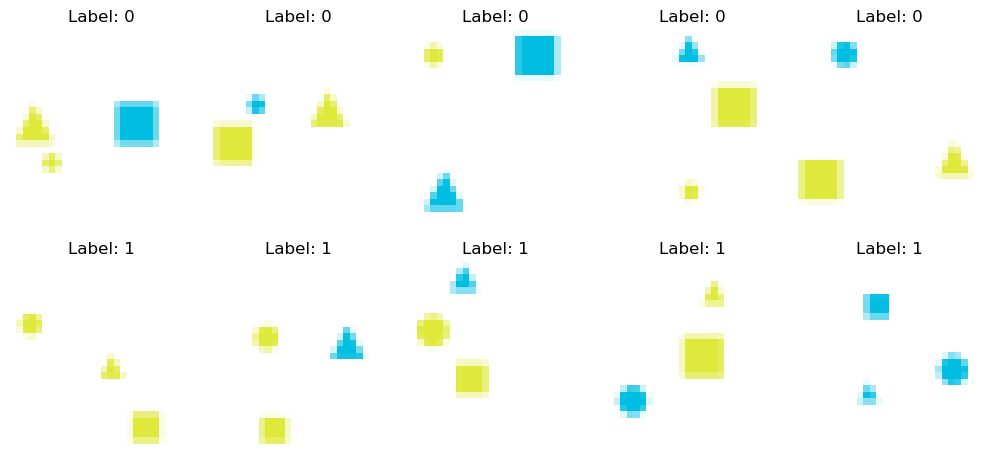

# instances per class: [15 10]
Baseline accuracy: 0.600
Grid-Based Set Kernel SVM Accuracy: 0.760


In [84]:
num_colors = 2
num_pixels = 28
num_samples = 300
max_shapes = 1


X, y = generate_dataset(
    num_samples=num_samples, 
    img_size=150, 
    num_pixels=num_pixels, 
    num_colors=num_colors, 
    fraction=2, 
    max_shapes=max_shapes)
X,y = filter_dataset(X,y)
display_sample_images(X, y, num_samples=5)

X = vectorize_images(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('# instances per class: %s'%np.unique(y_test, return_counts=True)[1])
print('Baseline accuracy: %.3f'%baseline_majority_accuracy(y_test))

def fix_kernel_func(X1, X2):
    return kernel_func(X1, X2, num_pixels=num_pixels, grid_size=5, ignore_color=(255, 255, 255))

from sklearn.svm import SVC
svm = SVC(kernel=fix_kernel_func)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Grid-Based Set Kernel SVM Accuracy: {accuracy:.3f}")

## Checkpoint

This is just a check-point, i.e. it is for you to see that you are correctly implementing all functions. 

Execute the following code (just execute the next cell):
```python
def fix_kernel_func(X1, X2):
    return kernel_func(X1, X2, num_pixels=num_pixels, grid_size=5, ignore_color=(255, 255, 255))

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scores_list = []
for it in range(5):
    print(f'{it+1}/3.. ', end='')
    X_train_p, _, y_train_p, _ = train_test_split(X_train, y_train, test_size=0.3)
    svm = SVC(kernel=fix_kernel_func, probability=True)
    svm.fit(X_train_p, y_train_p)
    y_pred = svm.predict_proba(X_test)
    scores_list.append(y_pred)

tpr_low, tpr_high, tpr_mid, fpr = compute_tpr_fpr_range(
    scores_list, 
    y_test, 
    false_positive_rate, 
    true_positive_rate, 
    low_quantile=.25, 
    high_quantile=.75
)

plot_roc(tpr_low, tpr_high, tpr_mid, fpr, compute_auc)
```

and check that you obtain a plot similar to:

<img src="img4.png" width=50%>


1/5.. 2/5.. 3/5.. 4/5.. 5/5.. 

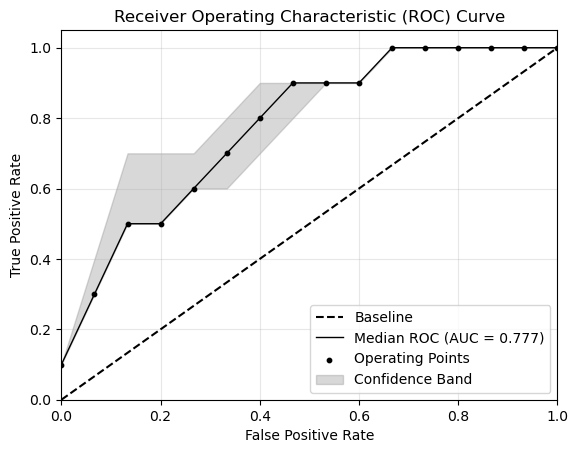

In [85]:
def fix_kernel_func(X1, X2):
    return kernel_func(X1, X2, num_pixels=num_pixels, grid_size=5, ignore_color=(255, 255, 255))

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
scores_list = []
for it in range(5):
    print(f'{it+1}/5.. ', end='')
    X_train_p, _, y_train_p, _ = train_test_split(X_train, y_train, test_size=0.3)
    svm = SVC(kernel=fix_kernel_func, probability=True)
    svm.fit(X_train_p, y_train_p)
    y_pred = svm.predict_proba(X_test)[:, 1]
    scores_list.append(y_pred)

tpr_low, tpr_high, tpr_mid, fpr = compute_tpr_fpr_range(
    scores_list, 
    y_test, 
    false_positive_rate, 
    true_positive_rate, 
    low_quantile=.25, 
    high_quantile=.75
)

plot_roc(tpr_low, tpr_high, tpr_mid, fpr, compute_auc)

## Open question
<div style="text-align: right"><b>[10 marks]</b></div>  

Run the following code. 

```python
cnn = SimpleCNN(image_size=num_pixels, num_filters=8, hidden_size=32)

normalized_X_train = X_train.astype(np.float32) / 255.0 - 0.5
normalized_X_test = X_test.astype(np.float32) / 255.0 - 0.5

cnn.fit(normalized_X_train, y_train, epochs=20, learning_rate=1e-2)
y_pred = cnn.predict(normalized_X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Simple CNN accuracy on training set: {accuracy:.3f}%")
y_pred = cnn.predict(normalized_X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Simple CNN accuracy on test set: {accuracy:.3f}%")
```

**Analysis of the Results**  

Examine the outcome and provide a detailed explanation addressing the following questions (max 200 words):  

- **Does learning occur?** Assess whether the SimpleCNN model is effectively learning the binary classification task. What evidence supports your conclusion?  
- **Training vs. Test Performance:** Compare the learning behavior observed on the training set and the test set. What patterns do you notice?  
- **Architectural Influence:** Explain how the architecture of the SimpleCNN model contributes to the observed relationship between training and test performance. What architectural choices impact generalization?

In [86]:
cnn = SimpleCNN(image_size=num_pixels, num_filters=8, hidden_size=32)

normalized_X_train = X_train.astype(np.float32) / 255.0 - 0.5
normalized_X_test = X_test.astype(np.float32) / 255.0 - 0.5

cnn.fit(normalized_X_train, y_train, epochs=20, learning_rate=1e-2)
y_pred = cnn.predict(normalized_X_train)
accuracy = accuracy_score(y_train, y_pred)
print(f"Simple CNN accuracy on training set: {accuracy:.3f}%")
y_pred = cnn.predict(normalized_X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Simple CNN accuracy on test set: {accuracy:.3f}%")

Epoch 1/20, Loss: 0.7037
Epoch 2/20, Loss: 0.6383
Epoch 3/20, Loss: 0.6422
Epoch 4/20, Loss: 0.6376
Epoch 5/20, Loss: 0.6606
Epoch 6/20, Loss: 0.6543
Epoch 7/20, Loss: 0.6334
Epoch 8/20, Loss: 0.6507
Epoch 9/20, Loss: 0.6517
Epoch 10/20, Loss: 0.6526
Epoch 11/20, Loss: 0.6531
Epoch 12/20, Loss: 0.6518
Epoch 13/20, Loss: 0.6602
Epoch 14/20, Loss: 0.6570
Epoch 15/20, Loss: 0.6588
Epoch 16/20, Loss: 0.6641
Epoch 17/20, Loss: 0.6921
Epoch 18/20, Loss: 0.7010
Epoch 19/20, Loss: 0.7142
Epoch 20/20, Loss: 0.7026
Simple CNN accuracy on training set: 0.860%
Simple CNN accuracy on test set: 0.520%


**Write your answer down here (max 200 words):**

Does learning occur?
The model shows minimal effective learning. There is an initial decrease in loss at the starting epochs, the loss stagnates for the subsequent epochs and increases at the end epochs. 

Training vs Test Performance:
A significant accuracy gap between training(0.86%) and test(0.52%) shows overfitting. The model runs well on known data but fails on unseen data. The loss increase towards the end epochs suggests that the model is unable to learn generalizable patterns.

Architechtural influence:
The simpleCNN architecture is likely to contribute to poor performance.
1. Insufficient complexity to learn patterns
2. Missing normalization
3. Inappropriate layer configurations
4. Poor weight initialization
5. Less feature extraction capabilities


In [87]:
# Do not consider the next cell.
# You do not have to do anything for the next cell.

In [ ]:
check_and_prepare_for_submission()